# Lezione 09

## Dario Pullia

### Esercizio 09.1

Spiegazioni varie

Figo come ho riempito i randompath

Superfiga la struttura dati

Flexino su quanto efficiente è il tutto

Flexone sul saper risolvere il problema con 300 punti in meno di 6 secondi

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
import imageio


''' Useful ruler
count=0
    
for i in range(1,X.size):
    count+=(Xord[i]-Xord[i-1])**2+(Yord[i]-Yord[i-1])**2

count+=(Xord[N-1]-Xord[0])**2+(Yord[N-1]-Yord[0])**2

print(count)    
'''    
    



C=0
X,Y = np.loadtxt("data01/PreCrossover/Circ/Region.dat",  usecols=(0,1), delimiter=' ', unpack='true')
Best = np.loadtxt("data01/PreCrossover/Circ/Bests.dat",)
fig=plt.figure(figsize=(5, 5))
filenames=[]
N=(X.size)
M=len(Best)-1
Xord=[]
Yord=[]

for i in range(X.size):
    Xord.append(X[int(Best[M][i])])
    Yord.append(Y[int(Best[M][i])])

plt.plot(Xord,Yord,marker="o",markersize=4,lw=1.3, label="Gen"+str(M)+"    Len: "+str(Best[M][N]))  
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()

<Figure size 500x500 with 1 Axes>

<img src="data01/PreCrossover/figsCirc/movie.gif" width="450" align="center">

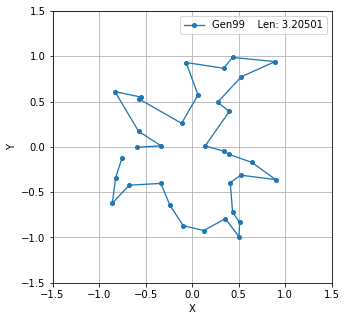

In [2]:
X,Y = np.loadtxt("data01/PreCrossover/Square/Region.dat",  usecols=(0,1), delimiter=' ', unpack='true')
Best = np.loadtxt("data01/PreCrossover/Square/Bests.dat",)
fig=plt.figure(figsize=(5, 5))
filenames=[]
N=(X.size)
M=len(Best)-1

Xord=[]
Yord=[]

for i in range(X.size):
    Xord.append(X[int(Best[M][i])])
    Yord.append(Y[int(Best[M][i])])


plt.plot(Xord,Yord,marker="o",markersize=4,lw=1.3, label="Gen"+str(M)+"    Len: "+str(Best[M][N]))  
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()

<img src="data01/PreCrossover/figsSquare/movie.gif" width="450" align="center">

<Figure size 360x360 with 0 Axes>

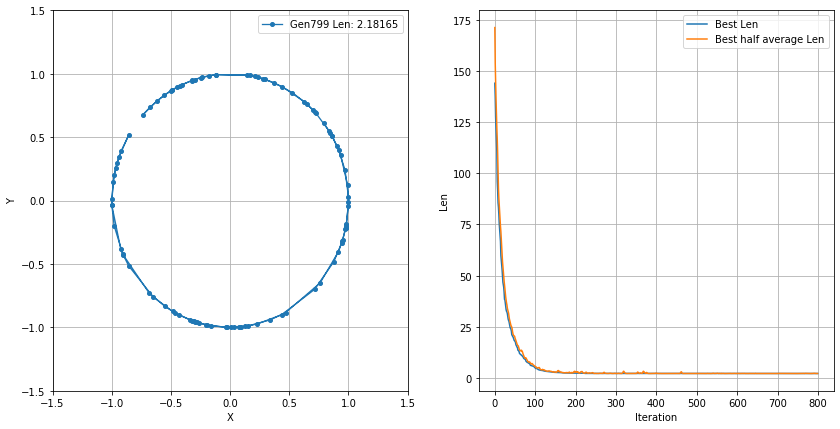

In [18]:
X,Y = np.loadtxt("data01/Circ/Region.dat",  usecols=(0,1), delimiter=' ', unpack='true')
Best = np.loadtxt("data01/Circ/Bests.dat",)
Len, LenAVG = np.loadtxt("data01/Circ/Bests.dat",  usecols=(X.size,X.size+1), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(5, 5))
filenames=[]
N=(X.size)
M=len(Best)-1
Xord=[]
Yord=[]

for i in range(X.size):
    Xord.append(X[int(Best[M][i])])
    Yord.append(Y[int(Best[M][i])])

    
    

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 7))
fig.suptitle('')
    
ax1.plot(Xord,Yord,marker="o",markersize=4,lw=1.3, label="Gen"+str(M)+" Len: "+str(Best[M][N]))  
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlim([-1.5, 1.5])
ax1.grid(True)
ax1.legend()


ax2.plot(np.arange(M+1), Len,label='Best Len')
ax2.plot(np.arange(M+1), LenAVG, label='Best half average Len')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Len')
ax2.grid(True)
ax2.legend()




plt.show()

<img src="data01/figsCirc/movie.gif" width="450" align="center">

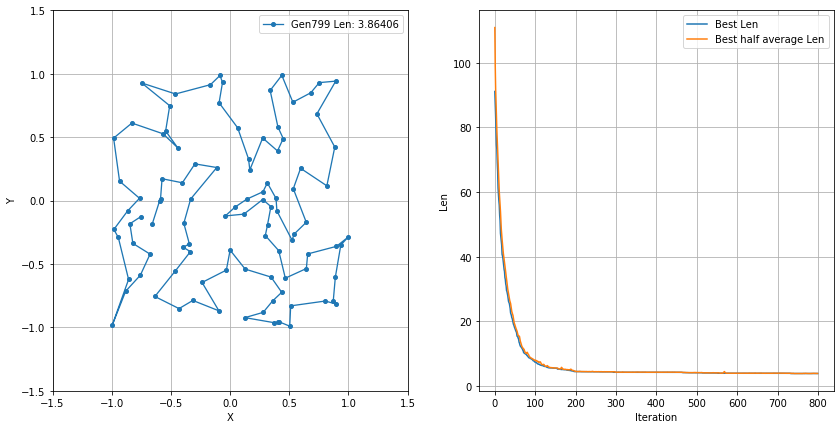

In [19]:
X,Y = np.loadtxt("data01/Square/Region.dat",  usecols=(0,1), delimiter=' ', unpack='true')
Best = np.loadtxt("data01/Square/Bests.dat",) 
Len, LenAVG = np.loadtxt("data01/Square/Bests.dat",  usecols=(X.size,X.size+1), delimiter=' ', unpack='true')

filenames=[]
N=(X.size)
M=len(Best)-1
Xord=[]
Yord=[]

for i in range(X.size):
    Xord.append(X[int(Best[M][i])])
    Yord.append(Y[int(Best[M][i])])

    
    

    

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 7))
fig.suptitle('')
    
ax1.plot(Xord,Yord,marker="o",markersize=4,lw=1.3, label="Gen"+str(M)+" Len: "+str(Best[M][N]))  
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlim([-1.5, 1.5])
ax1.grid(True)
ax1.legend()


ax2.plot(np.arange(M+1), Len,label='Best Len')
ax2.plot(np.arange(M+1), LenAVG, label='Best half average Len')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Len')
ax2.grid(True)
ax2.legend()


plt.show()


<img src="data01/figsSquare/movie.gif" width="450" align="center">